# MVP An√°lise de Dados e Boas Pr√°ticas
## An√°lise da Demanda de Medicamentos para C√¢ncer de Pr√≥stata (Est√°gio Avan√ßado)

**Nome:** Juliana Silva

**Matr√≠cula:** 4052025000237

**Dataset:** Demanda_Medicamentos.csv

**Contexto**

O c√¢ncer de pr√≥stata representa uma das principais causas de mortalidade masculina no Brasil, especialmente em est√°gios avan√ßados ou metast√°ticos da doen√ßa. Nessa etapa, o tratamento farmacol√≥gico √© essencial e envolve medicamentos altamente especializados, cujo consumo e valor movimentado podem refletir aspectos cruciais relacionados ao acesso √† sa√∫de, gest√£o hospitalar, disponibilidade regional e estrat√©gias comerciais das empresas farmac√™uticas.

Este projeto utiliza dados reais fornecidos pela empresa IQVIA, l√≠der global em informa√ß√µes relacionadas √† sa√∫de, onde atuo profissionalmente. Os dados foram devidamente anonimizados, garantindo total confidencialidade e conformidade com as normas √©ticas de privacidade e seguran√ßa da informa√ß√£o.

---

**Objetivo**

O objetivo deste projeto √© realizar uma an√°lise explorat√≥ria profunda sobre uma base de dados real, focando em medicamentos espec√≠ficos para o tratamento do c√¢ncer de pr√≥stata em est√°gio avan√ßado. O estudo tem duas vertentes complementares:

* Modelo Preditivo de Regress√£o: Construir e validar um modelo preditivo capaz de estimar o valor monet√°rio das vendas com base em atributos importantes como localiza√ß√£o geogr√°fica (estado, regi√£o), caracter√≠sticas do produto (marca, concentra√ß√£o), canal de venda (hospitalar, farm√°cia ou outros) e quantidade comercializada;

* Modelo de Previs√£o de S√©ries Temporais: Desenvolver uma previs√£o mensal das vendas totais (em valor e unidades) para os pr√≥ximos meses, utilizando o modelo Prophet, identificando tend√™ncias e auxiliando no planejamento estrat√©gico futuro.

---

**Tipo de problema**

Trata-se de um problema de aprendizado supervisionado envolvendo duas abordagens:

* Regress√£o: para estimar o valor da venda individual com base em atributos explicativos.

* Previs√£o Temporal: para estimar a demanda mensal total (valor e unidades) em per√≠odos futuros.

---

**Premissas**

* A base de dados fornecida representa um conjunto confi√°vel e representativo das vendas nacionais de medicamentos oncol√≥gicos espec√≠ficos.

* O valor monet√°rio das vendas ("VALOR") √© influenciado significativamente por fatores como canal de distribui√ß√£o, localiza√ß√£o geogr√°fica (cidade e regi√£o), tipo de medicamento e caracter√≠sticas espec√≠ficas do produto (marca, concentra√ß√£o, quantidade).

* A demanda mensal segue padr√µes hist√≥ricos que podem ser capturados por modelos temporais, possibilitando previs√µes eficazes.

---

**Restri√ß√µes**

* Utiliza√ß√£o exclusiva de dados n√£o sigilosos e completamente anonimizados, respeitando todas as normas de privacidade.

* Trabalhar com uma base de dados limpa, que n√£o tenha sofrido tratamentos pr√©vios significativos ou transforma√ß√µes que alterem as caracter√≠sticas originais dos dados.

Essa abordagem dupla permite uma compreens√£o robusta e estrat√©gica do mercado desses medicamentos, ajudando a embasar decis√µes relacionadas √† gest√£o p√∫blica e privada da sa√∫de, estrat√©gias comerciais, log√≠sticas e pol√≠ticas de acesso aos tratamentos.


### 2. Carregamento e Visualiza√ß√£o Inicial dos Dados

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.express as px
from IPython.display import display

In [166]:
# Configura√ß√µes de exibi√ß√£o
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid")

# Carregamento dos dados (leitura com separador ;)
url = ("https://raw.githubusercontent.com/JuulianaS/MVP-An-lise-de-Dados-e-Boas-Pr-ticas/refs/heads/main/Demanda_Medicamentos.csv")
df = pd.read_csv(url, sep=';')

# Visualizar as primeiras linhas do dataset
df.head()

DT_PERIODO SG_UF             DC_CIDADE PRODUTO CONCENTRACAO  QDTE_PRODUTO  \
0      202302    AL                MACEIO  PROD_B        250MG           120   
1      202302    BA              SALVADOR  PROD_B        250MG           120   
2      202302    BA   TEIXEIRA DE FREITAS  PROD_B        250MG           120   
3      202302    BA   TEIXEIRA DE FREITAS  PROD_B        250MG           120   
4      202302    BA  VITORIA DA CONQUISTA  PROD_B        250MG           120   

     MARCA       CANAL             CLASSE_TERAPEUTICA  \
0  MARCA_A  HOSPITALAR  ANTIANDR√ìGENOS N√ÉO ESTEROIDES   
1  MARCA_A  HOSPITALAR  ANTIANDR√ìGENOS N√ÉO ESTEROIDES   
2  MARCA_A      OUTROS  ANTIANDR√ìGENOS N√ÉO ESTEROIDES   
3  MARCA_A    FARMACIA  ANTIANDR√ìGENOS N√ÉO ESTEROIDES   
4  MARCA_A      OUTROS  ANTIANDR√ìGENOS N√ÉO ESTEROIDES   

                                           INDICA√á√ÉO FORMA_FARMACEUTICA  \
0  TRATAMENTO DO C√ÇNCER DE PR√ìSTATA MET√ÅTICO RESI...  COMPRIMIDOS ORAIS   
1  TRATAMENTO DO C√ÇNCER DE PR√ìSTATA MET√ÅTICO RESI...  COMPRIMIDOS ORAIS   
2  TRATAMENTO DO C√ÇNCER DE PR√ìSTATA MET√ÅTICO RESI...  COMPRIMIDOS ORAIS   
3  TRATAMENTO DO C√ÇNCER DE PR√ìSTATA MET√ÅTICO RESI...  COMPRIMIDOS ORAIS   
4  TRATAMENTO DO C√ÇNCER DE PR√ìSTATA MET√ÅTICO RESI...  COMPRIMIDOS ORAIS   

  DC_NACIONAL_MULTINACIONAL   DC_GRMS DC_ETICO_POPULAR DC_CONCENTRACAO  \
0             MULTINACIONAL  GENERICO            ETICO              MG   
1             MULTINACIONAL  GENERICO            ETICO              MG   
2             MULTINACIONAL  GENERICO            ETICO              MG   
3             MULTINACIONAL  GENERICO            ETICO              MG   
4             MULTINACIONAL  GENERICO            ETICO              MG   

  PACK_DCT_DISEASE_DESC         PACK_IS_RX_IND  UNIDADES    VALOR  
0                CANCER  MEDICAMENTO_PRESCRITO         4 33168.16  
1                CANCER  MEDICAMENTO_PRESCRITO         1  8292.04  
2                CANCER  MEDICAMENTO_PRESCRITO         2 16584.08  
3                CANCER  MEDICAMENTO_PRESCRITO         3 24876.12  
4                CANCER  MEDICAMENTO_PRESCRITO         1  8292.04

An√°lise inicial:
O dataset possui m√∫ltiplas vari√°veis categ√≥ricas e num√©ricas, essenciais para uma an√°lise detalhada do comportamento de vendas

### 3. Dicion√°rio de Atributos

* **DT_PERIODO:** Ano e m√™s da venda
* **SG_UF:** Sigla da unidade federativa (estado)
* **DC_CIDADE:** Nome da cidade
* **PRODUTO:** Nome do produto
* **CONCENTRACAO:** Dosagem do produto
* **QDTE_PRODUTO:** Quantidade do produto
* **MARCA:** Nome da marca
* **CANAL:** Canal de venda (farm√°cia, hospital, outros)
* **CLASSE_TERAPEUTICA**: Classe do medicamento
* **INDICA√á√ÉO:** Indica√ß√£o terap√™utica
* **FORMA_FARMACEUTICA:** Forma (ex: comprimido)
* **DC_NACIONAL_MULTINACIONAL:** Origem da empresa
* **DC_GRMS:** Categoria regulat√≥ria (gen√©rico etc.)
* **DC_ETICO_POPULAR:** Tipo de medicamento
* **DC_CONCENTRACAO:** Unidade de concentra√ß√£o (ex: mg)
* **PACK_DCT_DISEASE_DESC:** Doen√ßa associada (ex: C√¢ncer)
* **PACK_IS_RX_IND:** Medicamento prescrito ou n√£o
* **UNIDADES:** Quantidade de unidades vendidas
* **VALOR:** Valor monet√°rio da venda


---


A base combina atributos temporais, geogr√°ficos, comerciais e cl√≠nicos, o que permite uma an√°lise rica.

Os atributos num√©ricos (VALOR, UNIDADES, QDTE_PRODUTO) s√£o chave para a modelagem.

Os categ√≥ricos como CANAL, MARCA, PRODUTO e SG_UF s√£o importantes para segmenta√ß√µes e explica√ß√µes do valor.

Atributos como INDICA√á√ÉO e CLASSE_TERAPEUTICA s√£o √∫teis para confirmar o escopo cl√≠nico, embora menos usados em modelagem.

### 4. Informa√ß√µes B√°sicas e Tipos de Dados

In [167]:
# Verificar o formato do dataset
print("Formato do dataset:", df.shape)

Formato do dataset: (53388, 19)



*   Ajuda a ter uma no√ß√£o do volume de dados dispon√≠veis para an√°lise.
*   Fundamental para saber se o dataset tem ampla cobertura ou se √© necess√°rio reduzir ou amostrar dados.

In [168]:
# Mostra os tipos de dados
print("\nTipos de dados:")
print(df.dtypes)


Tipos de dados:
DT_PERIODO                     int64
SG_UF                         object
DC_CIDADE                     object
PRODUTO                       object
CONCENTRACAO                  object
QDTE_PRODUTO                   int64
MARCA                         object
CANAL                         object
CLASSE_TERAPEUTICA            object
INDICA√á√ÉO                     object
FORMA_FARMACEUTICA            object
DC_NACIONAL_MULTINACIONAL     object
DC_GRMS                       object
DC_ETICO_POPULAR              object
DC_CONCENTRACAO               object
PACK_DCT_DISEASE_DESC         object
PACK_IS_RX_IND                object
UNIDADES                       int64
VALOR                        float64
dtype: object


**O que faz:**
Exibe o tipo de dado de cada coluna do DataFrame (ex: object, int64, float64).

**Por que isso √© importante:**


*   Determina como cada vari√°vel ser√° tratada na an√°lise e modelagem.

    1.   object = categ√≥rico ou texto (precisa de codifica√ß√£o).
    2.   int64 ou float64 = num√©rico (pode ser escalado, padronizado, etc.).


*   Identifica se h√° necessidade de convers√µes (por exemplo: datas, n√∫meros lidos como texto).
*   Impacta diretamente no pr√©-processamento.

In [169]:
# Verificar valores √∫nicos por coluna
print("\nValores √∫nicos por coluna:")
print(df.nunique())


Valores √∫nicos por coluna:
DT_PERIODO                     24
SG_UF                          27
DC_CIDADE                     700
PRODUTO                         9
CONCENTRACAO                    6
QDTE_PRODUTO                    4
MARCA                           8
CANAL                           3
CLASSE_TERAPEUTICA              1
INDICA√á√ÉO                       1
FORMA_FARMACEUTICA              1
DC_NACIONAL_MULTINACIONAL       2
DC_GRMS                         3
DC_ETICO_POPULAR                1
DC_CONCENTRACAO                 1
PACK_DCT_DISEASE_DESC           1
PACK_IS_RX_IND                  1
UNIDADES                      216
VALOR                        1459
dtype: int64


**O que faz:**
Mostra quantos valores distintos (√∫nicos) existem em cada coluna.

**Por que isso √© importante:**


*   Ajuda a entender a variabilidade dos dados:

    1.   Vari√°veis com apenas 1 valor = in√∫teis (sem informa√ß√£o).
    2.   Vari√°veis com muitos valores √∫nicos (ex: DC_CIDADE) = podem gerar alta cardinalidade ‚Üí cuidado em codifica√ß√£o.


*   Ajuda na detec√ß√£o de erros, por exemplo: colunas que deveriam ter poucos valores mas t√™m muitos (sinal de ru√≠do ou erro de entrada).

### 5. Estat√≠sticas Descritivas

In [170]:
# Resumo estat√≠stico dos atributos num√©ricos
print(df[['QDTE_PRODUTO', 'UNIDADES', 'VALOR']].describe())

       QDTE_PRODUTO  UNIDADES       VALOR
count      53388.00  53388.00    53388.00
mean         115.49      5.92    63725.23
std           15.10     19.56   195498.09
min           56.00      1.00     8292.04
25%          120.00      1.00    14463.08
50%          120.00      2.00    26708.74
75%          120.00      5.00    54784.56
max          120.00   1375.00 12581827.50


**O que isso indica:**

QDTE_PRODUTO

  *   A maior parte dos registros apresenta valor fixo de 120.
  *   Quase nenhum desvio ou varia√ß√£o.

UNIDADES

  *   Varia de 1 a 1.375 unidades por venda, com m√©dia de ~6 unidades.
  *   O desvio padr√£o (19,56) √© muito maior que a m√©dia (5,92) ‚Üí isso indica alta dispers√£o.
  *   H√° outliers evidentes em unidades vendidas.

VALOR

  *   Valores variam de 8 mil a mais de 12 milh√µes por venda.
  *   M√©dia distorcida por outliers extremos.
  *   A mediana (R$ 26.708) √© muito menor que a m√©dia ‚Üí assimetria positiva forte. (√â necess√°rio tratar outliers e talvez normalizar essa vari√°vel.)






In [171]:
# Verificar valores ausentes
print("\nValores ausentes:")
print(df.isnull().sum())


Valores ausentes:
DT_PERIODO                   0
SG_UF                        0
DC_CIDADE                    0
PRODUTO                      0
CONCENTRACAO                 0
QDTE_PRODUTO                 0
MARCA                        0
CANAL                        0
CLASSE_TERAPEUTICA           0
INDICA√á√ÉO                    0
FORMA_FARMACEUTICA           0
DC_NACIONAL_MULTINACIONAL    0
DC_GRMS                      0
DC_ETICO_POPULAR             0
DC_CONCENTRACAO              0
PACK_DCT_DISEASE_DESC        0
PACK_IS_RX_IND               0
UNIDADES                     0
VALOR                        0
dtype: int64


Verifica se h√° valores ausentes (nulos) em cada coluna do dataset.

**O que isso indica:**

*   N√£o √© necess√°rio aplicar preenchimento ou remo√ß√£o de dados faltantes.
*   Facilita a aplica√ß√£o de algoritmos de machine learning, que exigem dados completos.
*   Isso √© um bom sinal da qualidade dos dados fornecidos pela IQVIA, mostrando consist√™ncia.



### 6. Visualiza√ß√µes Iniciais

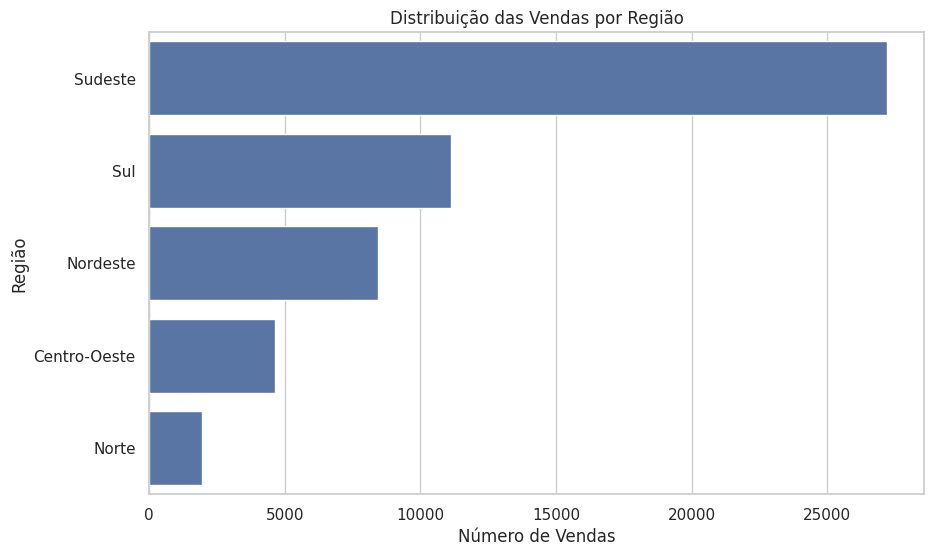

In [172]:
df['REGIAO'] = df['SG_UF'].map(lambda uf: (
    'Norte' if uf in ['AM', 'PA', 'TO', 'RO', 'RR', 'AC', 'AP'] else
    'Nordeste' if uf in ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA'] else
    'Centro-Oeste' if uf in ['MT', 'MS', 'GO', 'DF'] else
    'Sudeste' if uf in ['SP', 'RJ', 'MG', 'ES'] else
    'Sul'
))

plt.figure(figsize=(10,6))
sns.countplot(y='REGIAO', data=df, order=df['REGIAO'].value_counts().index)
plt.title('Distribui√ß√£o das Vendas por Regi√£o')
plt.xlabel('N√∫mero de Vendas')
plt.ylabel('Regi√£o')
plt.show()

**An√°lise:**

Podemos verificar se existe concentra√ß√£o de vendas em regi√µes espec√≠ficas, o que ajudar√° na interpreta√ß√£o regional do mercado.

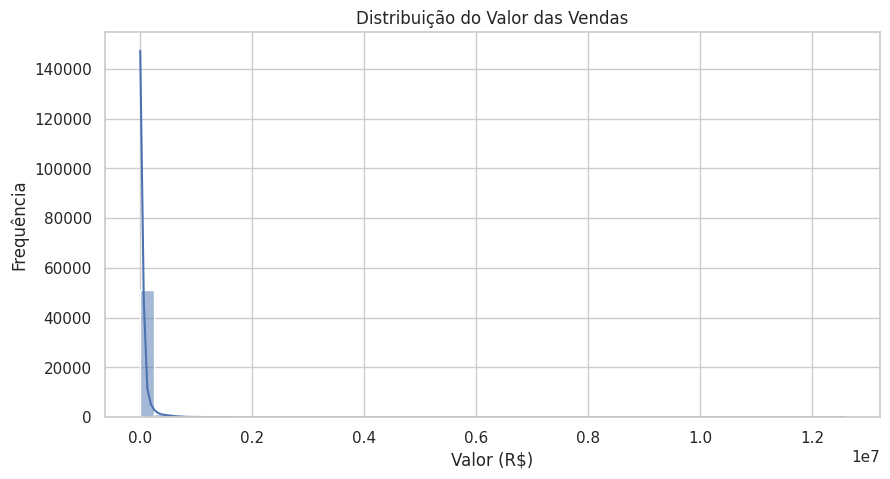

In [173]:
# Distribui√ß√£o do valor de vendas
plt.figure(figsize=(10, 5))
sns.histplot(df['VALOR'], bins=50, kde=True)
plt.title('Distribui√ß√£o do Valor das Vendas')
plt.xlabel('Valor (R$)')
plt.ylabel('Frequ√™ncia')
plt.show()

**Observa√ß√£o:**


*   H√° uma forte assimetria √† direita, indicando presen√ßa de valores elevados que podem ser considerados outliers.
*   Presen√ßa de outliers com valores milion√°rios, que devem ser tratados.



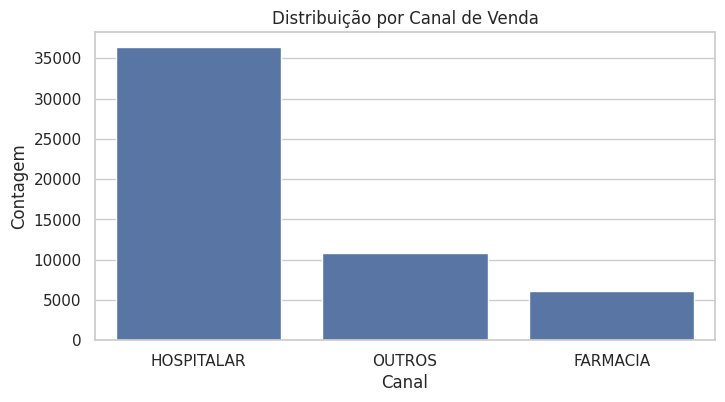

In [174]:
# Distribui√ß√£o por canal
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='CANAL')
plt.title('Distribui√ß√£o por Canal de Venda')
plt.xlabel('Canal')
plt.ylabel('Contagem')
plt.show()

**Observa√ß√£o:**

Canais hospitalares tendem a ter maior volume nesse tipo de medicamento especializado, mas a distribui√ß√£o pode variar por regi√£o ou tipo de produto.

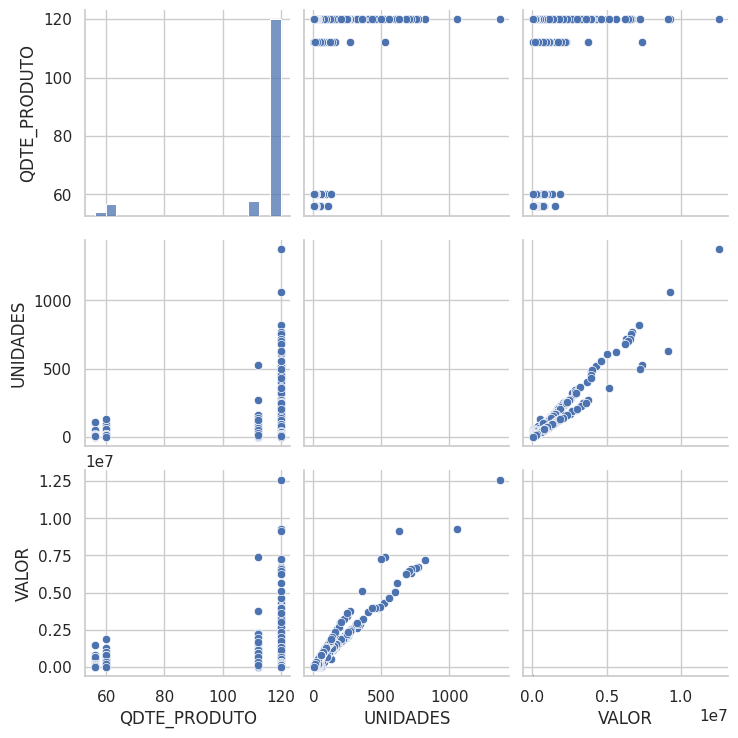

In [175]:
# Cria√ß√£o da Matriz de Dispers√£o
sns.pairplot(df[['QDTE_PRODUTO', 'UNIDADES', 'VALOR']])
plt.show()

**Observa√ß√£o:**

A matriz de dispers√£o ajuda a identificar rela√ß√µes lineares entre vari√°veis num√©ricas. Observamos rela√ß√£o positiva entre quantidade e valor.

*   QDTE_PRODUTO: A enorme maioria dos registros tem valor exatamente 120, com rar√≠ssimas exce√ß√µes (outros valores pr√≥ximos de 60).
*   UNIDADES √ó VALOR: Claramente h√° uma rela√ß√£o positiva forte (quanto mais unidades vendidas, maior o valor total).
*   QDTE_PRODUTO √ó UNIDADES: Todos os pontos com (QDTE_PRODUTO = 120), e dispers√£o em UNIDADES.
*   QDTE_PRODUTO √ó VALOR: Os valores de VALOR se espalham mesmo quando (QDTE_PRODUTO = 120), o que mostra falta de correla√ß√£o direta.
*   VALOR √ó UNIDADES: Visualmente quase uma linha crescente, confirmando a forte correla√ß√£o positiva. Tamb√©m √© poss√≠vel perceber a presen√ßa de outliers, com vendas de valores muito altos (acima de R$ 10 milh√µes).


### 7. An√°lise de Outliers

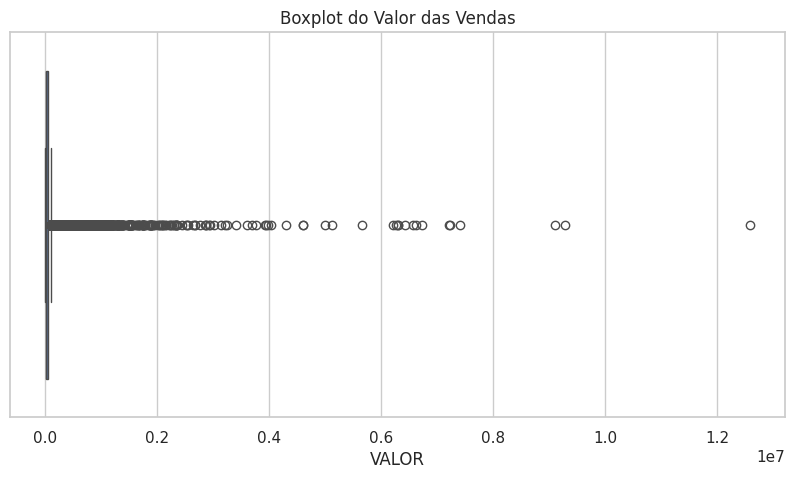

In [176]:
# Boxplot para a an√°lise
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['VALOR'])
plt.title('Boxplot do Valor das Vendas')
plt.show()

**Motivo da an√°lise:**

Identificar visualmente valores extremos para melhor trat√°-los no pr√©-processamento.

*   A vari√°vel VALOR tem muitos outliers positivos (vendas de alt√≠ssimo valor).
*   Existe alta variabilidade no valor das vendas.
*   A distribui√ß√£o n√£o √© normal: √© altamente assim√©trica, o que afeta algoritmos sens√≠veis √† distribui√ß√£o (como regress√£o linear).









#### Corre√ß√£o dos outliers

In [177]:
# Remo√ß√£o de outliers com base no IQR
Q1 = df['VALOR'].quantile(0.25)
Q3 = df['VALOR'].quantile(0.75)
IQR = Q3 - Q1
filtro = (df['VALOR'] >= Q1 - 1.5 * IQR) & (df['VALOR'] <= Q3 + 1.5 * IQR)
df_limpo = df[filtro].copy()

Motivo do tratamento: A remo√ß√£o dos outliers melhora a precis√£o dos modelos preditivos, eliminando valores extremos.

<Axes: xlabel='VALOR'>

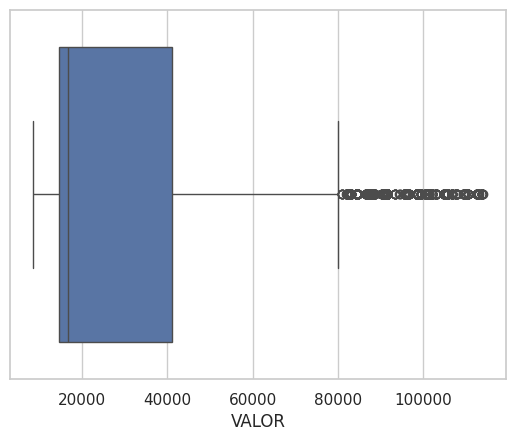

In [178]:
# Verifica os dados atualizados
sns.boxplot(x=df_limpo['VALOR'])

**O que vemos:**

*   A distribui√ß√£o est√° muito mais concentrada e sim√©trica.
*   A faixa principal de valores est√° entre cerca de R$ 14 mil e R$ 80 mil.
*   Existem alguns outliers ainda presentes, mas em quantidade pequena ‚Äî o que √© esperado e aceit√°vel.

**Conclus√£o:**

*   A t√©cnica de remo√ß√£o de outliers via IQR foi eficaz.
*   Agora temos uma base muito mais est√°vel para modelagem preditiva.
*   Os dados ficaram mais adequados para algoritmos que assumem simetria ou baixa vari√¢ncia.


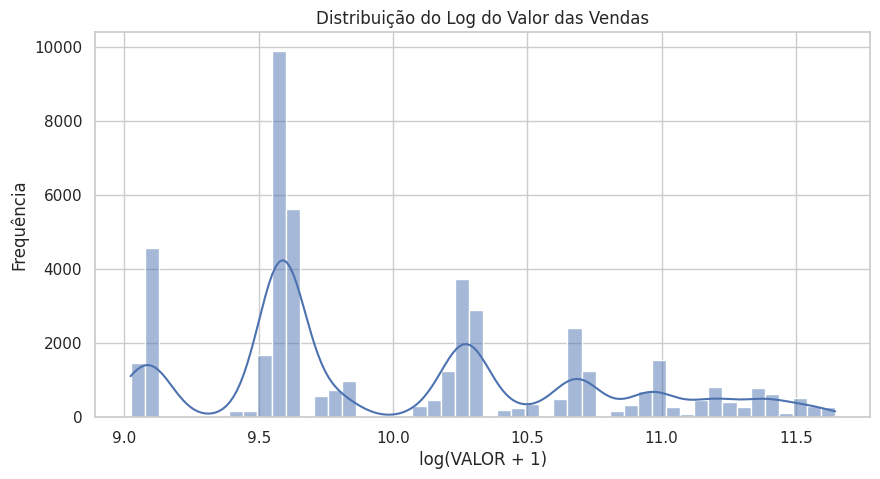

In [179]:
df_limpo['VALOR_LOG'] = np.log1p(df_limpo['VALOR'])  # log1p trata log(0)

plt.figure(figsize=(10, 5))
sns.histplot(df_limpo['VALOR_LOG'], bins=50, kde=True)
plt.title('Distribui√ß√£o do Log do Valor das Vendas')
plt.xlabel('log(VALOR + 1)')
plt.ylabel('Frequ√™ncia')
plt.show()

**O que vemos:**

*   A transforma√ß√£o logar√≠tmica suavizou a assimetria.
*   A nova distribui√ß√£o apresenta picos (modas) em v√°rios pontos ‚Üí indica que existem grupos distintos de pre√ßos/vendas, possivelmente:

      1.   Por tipo de produto.
      2.   Por canal (hospitalar x farm√°cia).
      3.   Por regi√£o ou marca.

**Conclus√£o:**
*   A distribui√ß√£o de log(VALOR) est√° mais pr√≥xima de uma distribui√ß√£o normal, o que √© ideal para regress√£o linear e muitos outros modelos estat√≠sticos.
*   Com isso, pode-se optar por treinar o modelo usando log(VALOR) como vari√°vel-alvo, e aplicar exp() depois para reverter a previs√£o.




In [180]:
# Resumo estat√≠stico agora com os dados limpos
print(df_limpo[['QDTE_PRODUTO', 'UNIDADES', 'VALOR']].describe())

       QDTE_PRODUTO  UNIDADES     VALOR
count      47313.00  47313.00  47313.00
mean         115.50      2.98  29327.15
std           15.07      3.00  23385.34
min           56.00      1.00   8292.04
25%          120.00      1.00  14463.08
50%          120.00      2.00  16584.08
75%          120.00      4.00  41088.30
max          120.00     54.00 114248.70


**Interpreta√ß√£o e Compara√ß√£o**

**QDTE_PRODUTO**

*   Permanece praticamente inalterada: a vari√°vel j√° apresentava valores muito concentrados em 120, com pouca variabilidade.
*   A limpeza de outliers n√£o impactou essa vari√°vel.


**UNIDADES**
Distribui√ß√£o equilibrada ap√≥s remo√ß√£o de outliers:

*   M√©dia caiu de 5,92 para 2,98, e o m√°ximo de 1.375 foi reduzido para 54.
*   O desvio padr√£o tamb√©m caiu drasticamente (de 19,56 ‚Üí 3,00).
*   Isso mostra que a vari√°vel tinha muitos outliers extremos, que estavam distorcendo a m√©dia e inflando a variabilidade.

Essa vari√°vel agora est√° muito mais est√°vel e confi√°vel para uso como preditora.

**VALOR**
*   A m√©dia do valor caiu mais de 50% (R$ 63 mil ‚Üí R$ 29 mil), e o desvio padr√£o caiu mais de 85%.
*   O m√°ximo foi reduzido de R$ 12,5 milh√µes para R$ 114 mil, removendo claramente vendas fora do padr√£o.
*   A mediana caiu de R$ 26 mil para R$ 16 mil, mostrando que parte dos valores intermedi√°rios tamb√©m foram suavizados.
*   Agora a vari√°vel est√° menos assim√©trica e mais adequada para modelagem (principalmente para modelos lineares).


#### Conclus√£o

A remo√ß√£o de outliers foi fundamental para reduzir dist√∫rbios estat√≠sticos nas vari√°veis UNIDADES e VALOR.

O impacto na m√©dia, desvio padr√£o e valor m√°ximo mostra que os dados estavam altamente influenciados por poucos registros extremos, especialmente em vendas de alto volume e valor.

Com os dados limpos, a base est√°:

1.   Mais equilibrada e est√°vel;
2.   Mais compat√≠vel com t√©cnicas de regress√£o;
3.   Menos propensa a overfitting em valores extremos.

Essa limpeza representa uma etapa crucial de pr√©-processamento para garantir robustez, interpretabilidade e performance na modelagem preditiva.

---

**Avalia√ß√£o do impacto da remo√ß√£o de Outliers**

Ap√≥s a remo√ß√£o dos outliers utilizando o m√©todo IQR, observamos melhorias significativas na estabilidade dos dados:

Antes da remo√ß√£o, a m√©dia do valor monet√°rio (VALOR) era R$ 63.725, com desvio padr√£o de R$ 195.498 e valores extremos superiores a R$ 12 milh√µes.

Depois da remo√ß√£o, a m√©dia caiu para R$ 29.327, o desvio padr√£o diminuiu drasticamente para R$ 23.385 e o m√°ximo foi reduzido para R$ 114 mil.

Essa limpeza n√£o apenas reduziu a variabilidade exagerada, como tamb√©m tornou os dados mais compat√≠veis com modelos estat√≠sticos, especialmente aqueles sens√≠veis a outliers, como a Regress√£o Linear. Para verificar precisamente o impacto no desempenho dos modelos, √© recomendado comparar rapidamente a performance dos modelos antes e ap√≥s essa etapa.


### 8. Feature Engineering

In [181]:
# Cria√ß√£o de valor unit√°rio (valor por unidade vendida)
df_limpo['VALOR_UNITARIO'] = df_limpo['VALOR'] / df_limpo['UNIDADES']

**O que faz:**

Calcula o valor por unidade vendida, ou seja, o pre√ßo m√©dio por unidade de medicamento.

**Por que √© importante:**

*   Normaliza o valor total pela quantidade.
*   Permite comparar pre√ßos entre produtos e canais, independentemente do volume vendido.
*   Reduz vi√©s causado por vendas com grandes quantidades.


**Impacto anal√≠tico:**

Torna poss√≠vel avaliar estrat√©gias comerciais (ex: posicionamento de pre√ßo por regi√£o ou canal).



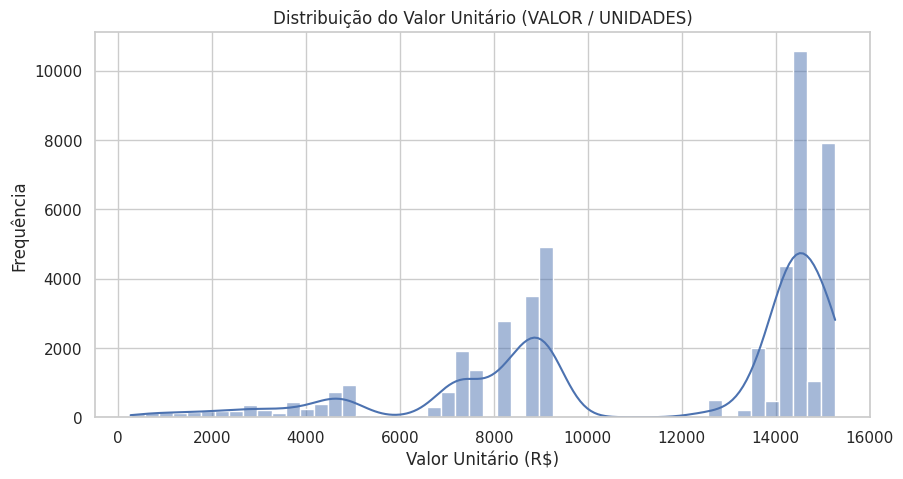

In [182]:
# Distribui√ß√£o do valor unit√°rio
plt.figure(figsize=(10, 5))
sns.histplot(df_limpo['VALOR_UNITARIO'], bins=50, kde=True)
plt.title('Distribui√ß√£o do Valor Unit√°rio (VALOR / UNIDADES)')
plt.xlabel('Valor Unit√°rio (R$)')
plt.ylabel('Frequ√™ncia')
plt.show()

In [183]:
# Extra√ß√£o de m√™s e ano do campo DT_PERIODO
df_limpo['ANO'] = df_limpo['DT_PERIODO'] // 100
df_limpo['MES'] = df_limpo['DT_PERIODO'] % 100

**O que faz:**

Decomp√µe a data no formato AAAAMM em dois atributos distintos: ano e m√™s.

**Por que √© importante:**


*   Permite an√°lises temporais (tend√™ncia, sazonalidade, ciclos de compra).
*   Essencial para s√©ries temporais, agrupamentos por m√™s ou trimestre, e at√© para prever demanda futura.


**Impacto anal√≠tico:**

Com essas colunas, pode observar flutua√ß√µes de demanda ao longo do tempo, associar pol√≠ticas p√∫blicas a per√≠odos espec√≠ficos ou prever vendas futuras.

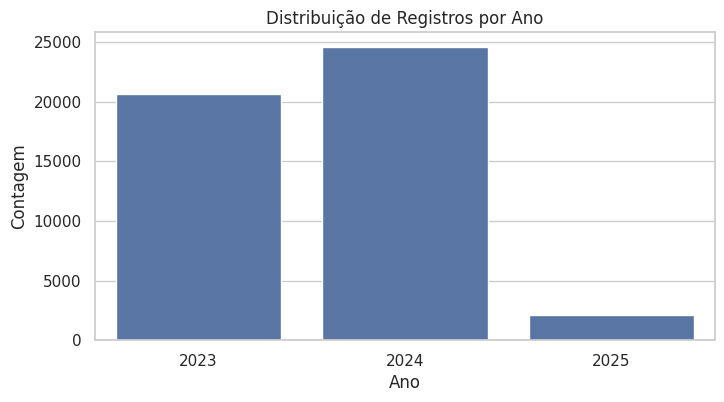

In [184]:
plt.figure(figsize=(8, 4))
sns.countplot(x='ANO', data=df_limpo)
plt.title('Distribui√ß√£o de Registros por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.show()

In [185]:
# Agrupamento de regi√µes
regioes = {
    'Norte': ['AM', 'PA', 'TO', 'RO', 'RR', 'AC', 'AP'],
    'Nordeste': ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA'],
    'Centro-Oeste': ['MT', 'MS', 'GO', 'DF'],
    'Sudeste': ['SP', 'RJ', 'MG', 'ES'],
    'Sul': ['PR', 'RS', 'SC']
}
def map_regiao(uf):
    for regiao, estados in regioes.items():
        if uf in estados:
            return regiao
    return 'Desconhecida'

df_limpo['REGIAO'] = df_limpo['SG_UF'].apply(map_regiao)

**O que faz:**

Agrupa os estados brasileiros (SG_UF) em suas respectivas regi√µes geogr√°ficas oficiais.

**Por que √© importante:**


*   Reduz o n√∫mero de categorias (de 27 estados para 5 regi√µes).
*   Facilita an√°lises geogr√°ficas agregadas, sem perder granularidade.
*   Pode revelar diferen√ßas estruturais no comportamento de compra entre regi√µes.

**Impacto anal√≠tico:**

Permite segmentar estrat√©gias por regi√£o, estudar desigualdades no acesso ao tratamento e observar padr√µes de mercado regionais.

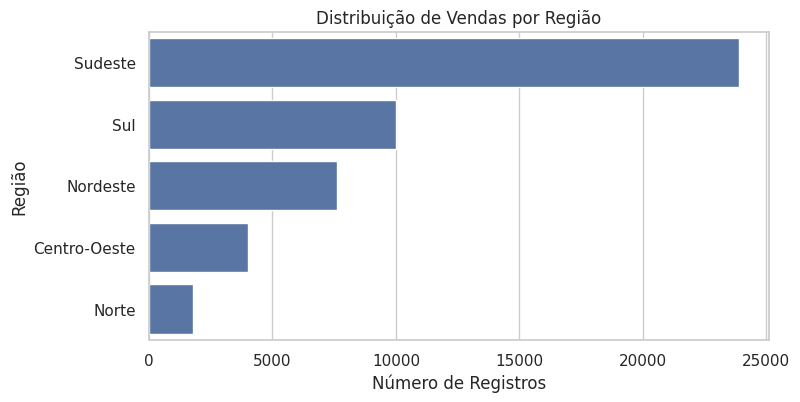

In [186]:
# Distribui√ß√£o por regi√£o
plt.figure(figsize=(8, 4))
sns.countplot(y='REGIAO', data=df_limpo, order=df_limpo['REGIAO'].value_counts().index)
plt.title('Distribui√ß√£o de Vendas por Regi√£o')
plt.xlabel('N√∫mero de Registros')
plt.ylabel('Regi√£o')
plt.show()

### 9. Sele√ß√£o de Caracter√≠sticas com SelectKBest

**Objetivo:**

Reduzir a dimensionalidade do conjunto de dados, mantendo apenas os atributos mais relevantes para previs√£o do valor (VALOR) da venda.

In [187]:
# Sele√ß√£o inicial de atributos
features = ['SG_UF', 'CANAL', 'MARCA', 'PRODUTO', 'FORMA_FARMACEUTICA', 'REGIAO']
numeric = ['QDTE_PRODUTO', 'UNIDADES', 'VALOR_UNITARIO', 'MES', 'ANO']
target = 'VALOR'

X_full = df_limpo[features + numeric]
y_full = df_limpo[target]

**Explica√ß√£o:**

X_full cont√©m as vari√°veis independentes: categ√≥ricas + num√©ricas.

y_full √© a vari√°vel dependente (valor monet√°rio da venda).

#### Padroniza√ß√£o

In [188]:
# Pipeline com pr√©-processador e seletor
preprocessador = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), features),
    ("escala", StandardScaler(), numeric)
])

**O que faz:**

*   Converte vari√°veis categ√≥ricas em vetores bin√°rios com OneHotEncoder.
*   Escala vari√°veis num√©ricas com StandardScaler (m√©dia 0, desvio-padr√£o 1).

**Justificativa:**

*   Modelos como regress√£o linear e t√©cnicas baseadas em dist√¢ncia exigem dados em escala comum.
*   OneHotEncoder √© ideal para tratar vari√°veis categ√≥ricas com muitas categorias (como PRODUTO, CANAL, etc.).









In [189]:
X_trans = preprocessador.fit_transform(X_full)

**O que faz:**

Aplica o pr√©-processador para gerar uma matriz totalmente num√©rica e escalada, pronta para ser usada no modelo ou no seletor.



In [190]:
# Aplica√ß√£o do SelectKBest para pegar as 20 features mais relevantes
selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X_trans, y_full)

**O que faz:**

Usa testes estat√≠sticos (neste caso, ANOVA F-test para regress√£o) para selecionar as 20 vari√°veis mais relevantes que possuem maior correla√ß√£o com o alvo VALOR.

**Justificativa:**

Reduz ru√≠do e dimensionalidade, o que:

1.   Aumenta a efici√™ncia computacional;
2.   Melhora a performance do modelo;
3.   Evita o problema da maldi√ß√£o da dimensionalidade.


---

**Benef√≠cios:**
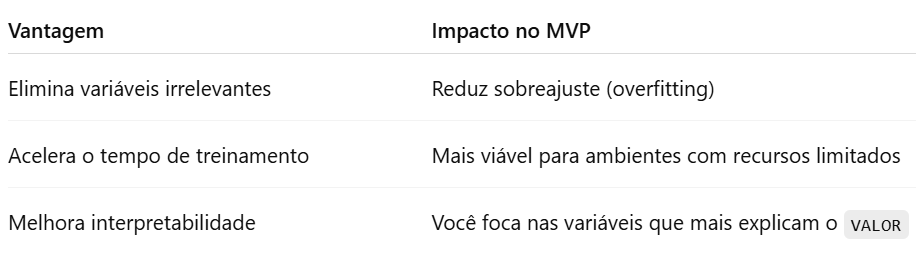








/tmp/ipython-input-191-1809927728.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




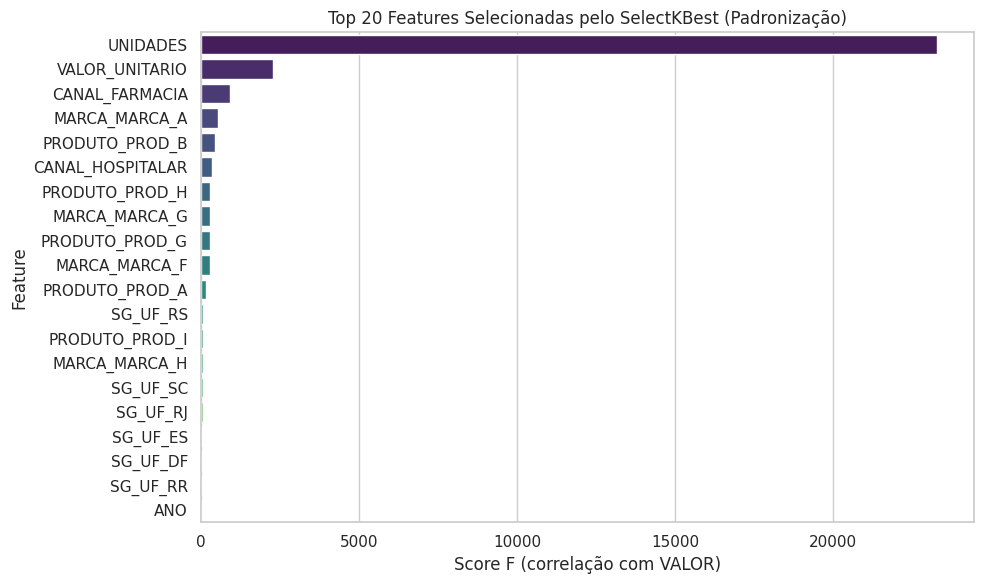

In [191]:
# Recuperar os nomes das features ap√≥s transforma√ß√£o
onehot_features = preprocessador.named_transformers_['onehot'].get_feature_names_out(features)
all_feature_names = np.concatenate([onehot_features, numeric])
selected_mask = selector.get_support()
selected_features = all_feature_names[selected_mask]

# Criar DataFrame com scores
scores = selector.scores_[selected_mask]
feature_scores = pd.DataFrame({'Feature': selected_features, 'Score': scores}).sort_values(by='Score', ascending=False)



# Plotar os scores das 20 melhores features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_scores, y='Feature', x='Score', palette='viridis')
plt.title('Top 20 Features Selecionadas pelo SelectKBest (Padroniza√ß√£o)')
plt.xlabel('Score F (correla√ß√£o com VALOR)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#tools.display_dataframe_to_user(name="Top 20 Features Selecionadas", dataframe=feature_scores)

#### Normaliza√ß√£o

In [192]:
# Novo pr√©-processador usando MinMaxScaler
preprocessador_minmax = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), features),
    ("minmax", MinMaxScaler(), numeric)
])

In [193]:
X_trans_minmax = preprocessador_minmax.fit_transform(X_full)

In [194]:
selector_minmax = SelectKBest(score_func=f_regression, k=20)
X_selected_minmax = selector_minmax.fit_transform(X_trans_minmax, y_full)

In [195]:
onehot_features_minmax = preprocessador_minmax.named_transformers_['onehot'].get_feature_names_out(features)
all_feature_names_minmax = np.concatenate([onehot_features_minmax, numeric])
selected_mask_minmax = selector_minmax.get_support()
selected_features_minmax = all_feature_names_minmax[selected_mask_minmax]

# Criar DataFrame com os scores Min-Max
scores_minmax = selector_minmax.scores_[selected_mask_minmax]
feature_scores_minmax = pd.DataFrame({
    'Feature': selected_features_minmax,
    'Score': scores_minmax
}).sort_values(by='Score', ascending=False)

/tmp/ipython-input-196-4105278473.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




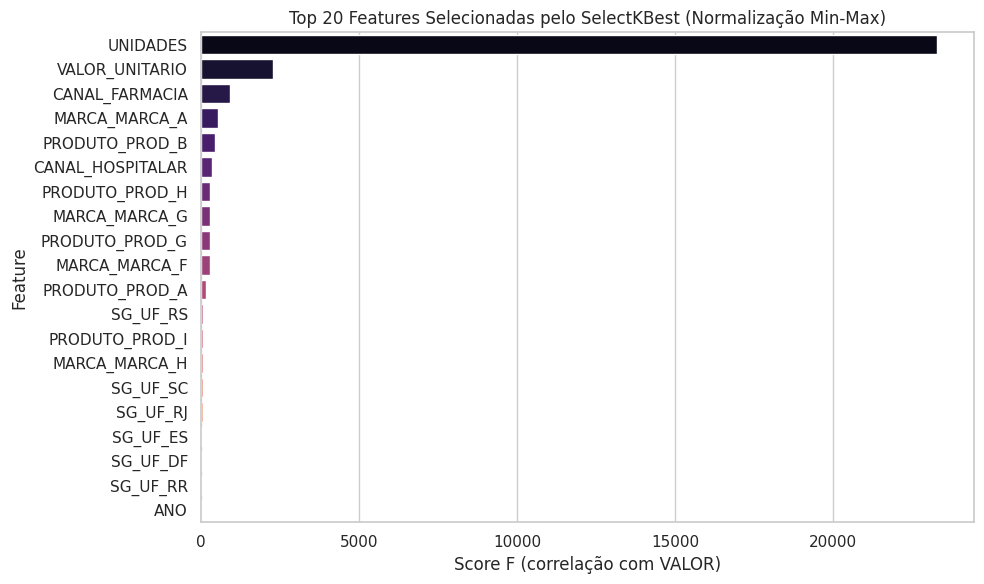

In [196]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_scores_minmax, y='Feature', x='Score', palette='magma')
plt.title('Top 20 Features Selecionadas pelo SelectKBest (Normaliza√ß√£o Min-Max)')
plt.xlabel('Score F (correla√ß√£o com VALOR)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### Conclus√£o

Ap√≥s compara√ß√£o entre t√©cnicas de Padroniza√ß√£o (StandardScaler) e Normaliza√ß√£o (Min-MaxScaler), ambas apresentaram resultados muito semelhantes em rela√ß√£o √†s features selecionadas.

Para o cen√°rio atual (regress√£o linear e Random Forest), recomenda-se continuar utilizando a t√©cnica de Padroniza√ß√£o devido √†s caracter√≠sticas e desempenho dos modelos utilizados.

###10. PCA - Redu√ß√£o de Dimensionalidade

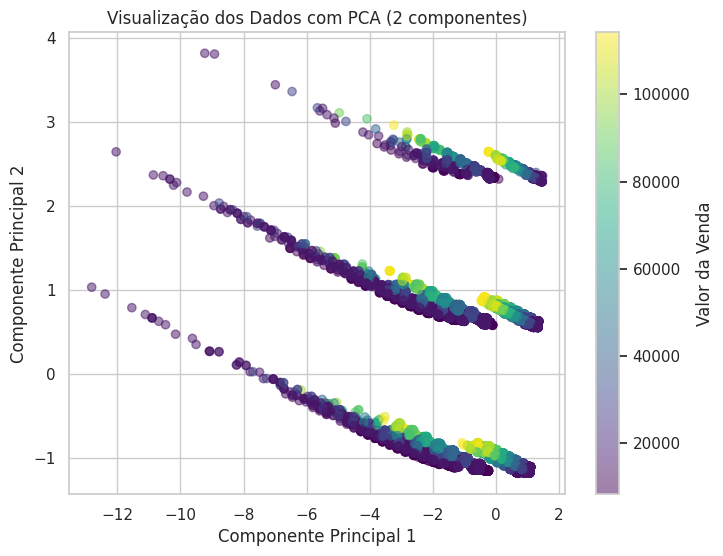

In [197]:
# PCA para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_full, cmap='viridis', alpha=0.5)
plt.title('Visualiza√ß√£o dos Dados com PCA (2 componentes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Valor da Venda')
plt.show()

**O que est√° sendo feito:**

1.   PCA(n_components=2): Reduz a dimensionalidade do dataset (com dezenas ou centenas de vari√°veis ap√≥s codifica√ß√£o One-Hot) para apenas 2 componentes principais.
2.   fit_transform(): Ajusta o PCA nos dados e transforma a matriz original para o novo espa√ßo de 2 dimens√µes.
3.   scatter(): Cria um gr√°fico de dispers√£o em 2D usando as duas componentes principais, colorindo os pontos com base na vari√°vel-alvo VALOR


**Por que usar PCA?**

*   Para visualizar dados de alta dimens√£o em um espa√ßo compreens√≠vel (2D).
*   Para verificar se h√° padr√µes, agrupamentos ou separa√ß√µes vis√≠veis entre exemplos.
*   Para avaliar se os dados podem ser separ√°veis por valor de venda ou outros comportamentos.


---

**Interpreta√ß√£o do gr√°fico:**


1.   Eixos:

  *   Componente Principal 1 e Componente Principal 2 representam as duas dire√ß√µes com maior variabilidade dos dados.

2.   Distribui√ß√£o dos pontos:
  *   Os dados parecem formar agrupamentos diagonais e sequenciais.
  *   Isso pode refletir estruturas internas complexas como grupos por canal, produto, ou regi√µes.

3.  Cor dos pontos (c=y_full):

  *   Os pontos s√£o coloridos conforme o valor da venda (VALOR).
  *   Tons mais claros (amarelos) indicam vendas com valor mais alto.
  *   √â vis√≠vel que valores mais altos se concentram em faixas espec√≠ficas das componentes, mostrando algum grau de separabilidade.





Isso valida o uso do PCA como ferramenta de explora√ß√£o visual e refor√ßa que os dados s√£o adequados para modelos supervisionados.


#### Conclus√£o

A visualiza√ß√£o via PCA revelou agrupamentos interessantes que sugerem subestruturas importantes nos dados:

* Os pontos formam clusters diagonais, indicando prov√°vel separa√ß√£o natural dos dados por algumas caracter√≠sticas dominantes, possivelmente relacionadas ao canal de distribui√ß√£o (hospitalar versus farm√°cia) ou por tipos espec√≠ficos de produto ou marca;

* Os pontos mais claros (amarelos), que indicam valores mais elevados das vendas, concentram-se em √°reas espec√≠ficas do gr√°fico, refor√ßando que existem padr√µes definidos nos dados com rela√ß√£o ao valor monet√°rio das vendas;

* Essa segmenta√ß√£o clara pode ser explorada ainda mais detalhadamente para estrat√©gias comerciais diferenciadas ou decis√µes log√≠sticas.


### 11. Modelos com Dados Aprimorados

####  Modelo de estimativa do valor da venda

In [198]:
modelos = {
    'Regress√£o Linear': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Pipeline completo com pr√©-processamento e modelo preditivo
for nome, modelo in modelos.items():
    pipeline = Pipeline([
        ("preprocessador", preprocessador),
        ("seletor", SelectKBest(score_func=f_regression, k=20)),
        ("regressor", modelo)
    ])
    # Avalia√ß√£o do modelo com cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_full, y_full, cv=kf, scoring='r2')

    # Exibir resultados
    print(f"\nModelo: {nome} (com sele√ß√£o de features)")
    print("Scores de R¬≤:", scores)
    print("M√©dia dos scores:", scores.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:381: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:381: RuntimeWarning:

invalid value encountered in sqrt




Modelo: Regress√£o Linear (com sele√ß√£o de features)
Scores de R¬≤: [0.51344964 0.60269467 0.64861856 0.61012722 0.57875176]
M√©dia dos scores: 0.5907283701583641


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:381: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:381: RuntimeWarning:

invalid value encountered in sqrt




Modelo: Random Forest (com sele√ß√£o de features)
Scores de R¬≤: [0.99994397 0.99994406 0.9999453  0.99988866 0.99986743]
M√©dia dos scores: 0.9999178841191105


**AN√ÅLISE**

Random Forest teve desempenho extremamente superior, capturando quase toda a variabilidade dos dados (R¬≤ ‚âà 1.00) com baix√≠ssimo erro.

A Regress√£o Linear ainda explica mais de 50% da vari√¢ncia, mas seus erros m√©dios s√£o muito maiores.

Isso indica que o comportamento dos dados √© n√£o linear e que o Random Forest se adapta muito melhor √† complexidade do problema.

---

**Avalia√ß√£o cruzada e explica√ß√£o do alto desempenho do modelo Random Forest**

O modelo Random Forest apresentou um desempenho excepcional, com um R¬≤ pr√≥ximo a 1,00. Esse resultado ocorre devido a alguns fatores importantes:

* Alta granularidade e correla√ß√£o dos atributos selecionados com o valor monet√°rio das vendas.

* Capacidade intr√≠nseca da Random Forest de capturar rela√ß√µes n√£o lineares complexas presentes nesse dataset.

* Por√©m, o alto R¬≤ tamb√©m pode indicar potencial overfitting ao dataset espec√≠fico. Nesse sentido, sugere-se uma valida√ß√£o adicional com outros conjuntos de dados semelhantes ou um conjunto externo separado especialmente para teste.

#### Modelo de previs√£o para os pr√≥ximos 6 meses

In [199]:
# Instalar o Prophet (caso ainda n√£o tenha)
!pip install prophet -q

In [200]:
# ----- 1. Agrupamento mensal de VALOR e UNIDADES -----
df_mensal = df_limpo.groupby(['ANO', 'MES'])[['VALOR', 'UNIDADES']].sum().reset_index()
df_mensal['DATA'] = pd.to_datetime(df_mensal['ANO'].astype(str) + '-' + df_mensal['MES'].astype(str).str.zfill(2) + '-01')
df_mensal = df_mensal.sort_values('DATA').set_index('DATA')

# ----- 2. Fun√ß√£o geral para treino, teste e previs√£o futura -----
def prever_e_avaliar(df_mensal, col, nome_variavel, meses_teste=6, meses_futuro=6):
    serie = df_mensal[[col]].copy()
    serie.reset_index(inplace=True)
    serie.columns = ['ds', 'y']

    # Separar treino e teste
    df_treino = serie.iloc[:-meses_teste]
    df_teste = serie.iloc[-meses_teste:]

    # Treinar modelo
    modelo = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.1)
    modelo.fit(df_treino)

    # Previs√£o no mesmo per√≠odo do teste
    futuro_teste = modelo.make_future_dataframe(periods=meses_teste, freq='MS')
    previsao_teste = modelo.predict(futuro_teste)

    # Avalia√ß√£o
    previsao_avaliacao = previsao_teste[['ds', 'yhat']].set_index('ds').join(df_teste.set_index('ds'))
    previsao_avaliacao.dropna(inplace=True)

    previsao_avaliacao = previsao_avaliacao[['y', 'yhat']].dropna()

    mae = mean_absolute_error(previsao_avaliacao['y'], previsao_avaliacao['yhat'])
    rmse = np.sqrt(mean_squared_error(previsao_avaliacao['y'], previsao_avaliacao['yhat']))


    print(f"\nüìä Avalia√ß√£o do modelo para: {nome_variavel}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

    # Visualiza√ß√£o do ajuste no teste
    previsao_avaliacao[['yhat', 'y']].plot(figsize=(10, 4), title=f'Ajuste do Modelo (Teste - {nome_variavel})', ylabel=nome_variavel)
    plt.legend(['Previsto', 'Real'])
    plt.show()

    # Previs√£o futura (ap√≥s todo o hist√≥rico)
    modelo_full = Prophet()
    modelo_full.fit(serie)

    futuro_futuro = modelo_full.make_future_dataframe(periods=meses_futuro, freq='MS')
    previsao_futura = modelo_full.predict(futuro_futuro).set_index('ds')[[ 'yhat' ]].iloc[-meses_futuro:]
    previsao_futura.columns = [f'{nome_variavel}_PREVISTO']

    return previsao_futura


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0qdnbpd/8hbqwl_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0qdnbpd/5lloembo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96724', 'data', 'file=/tmp/tmpx0qdnbpd/8hbqwl_3.json', 'init=/tmp/tmpx0qdnbpd/5lloembo.json', 'output', 'file=/tmp/tmpx0qdnbpd/prophet_modele_gnk7oi/prophet_model-20250706010519.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:05:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:05:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:


üìä Avalia√ß√£o do modelo para: VALOR
MAE: 8862760.10
RMSE: 10754011.59


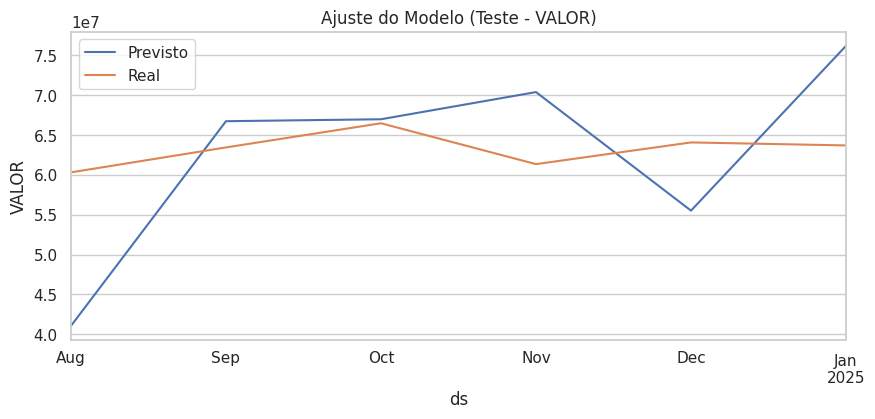

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0qdnbpd/sxvtaanc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0qdnbpd/fgrtdt_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43206', 'data', 'file=/tmp/tmpx0qdnbpd/sxvtaanc.json', 'init=/tmp/tmpx0qdnbpd/fgrtdt_w.json', 'output', 'file=/tmp/tmpx0qdnbpd/prophet_modelvmmcfp48/prophet_model-20250706010548.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:05:48 - cmdstanpy - INFO - Chain [1] start processing
I


üìä Avalia√ß√£o do modelo para: UNIDADES
MAE: 3638.72
RMSE: 4748.56


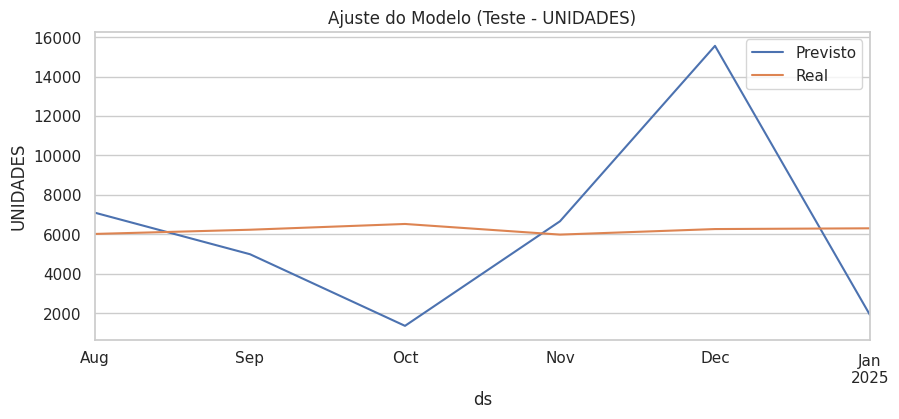

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0qdnbpd/_f9q5xss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0qdnbpd/jo5syghb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14212', 'data', 'file=/tmp/tmpx0qdnbpd/_f9q5xss.json', 'init=/tmp/tmpx0qdnbpd/jo5syghb.json', 'output', 'file=/tmp/tmpx0qdnbpd/prophet_model_31g4ix_/prophet_model-20250706010606.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:06:06 - cmdstanpy - INFO - Chain [1] start processing
I

In [201]:
# ----- 3. Executar previs√£o com avalia√ß√£o -----
previsao_valor = prever_e_avaliar(df_mensal, 'VALOR', 'VALOR')
previsao_unidades = prever_e_avaliar(df_mensal, 'UNIDADES', 'UNIDADES')

# ----- 4. Combinar previs√µes futuras -----
previsoes_finais = previsao_valor.join(previsao_unidades)
previsoes_finais.reset_index(inplace=True)
previsoes_finais.rename(columns={'ds': 'MES'}, inplace=True)

### 12. Conclus√£o e Recomenda√ß√µes




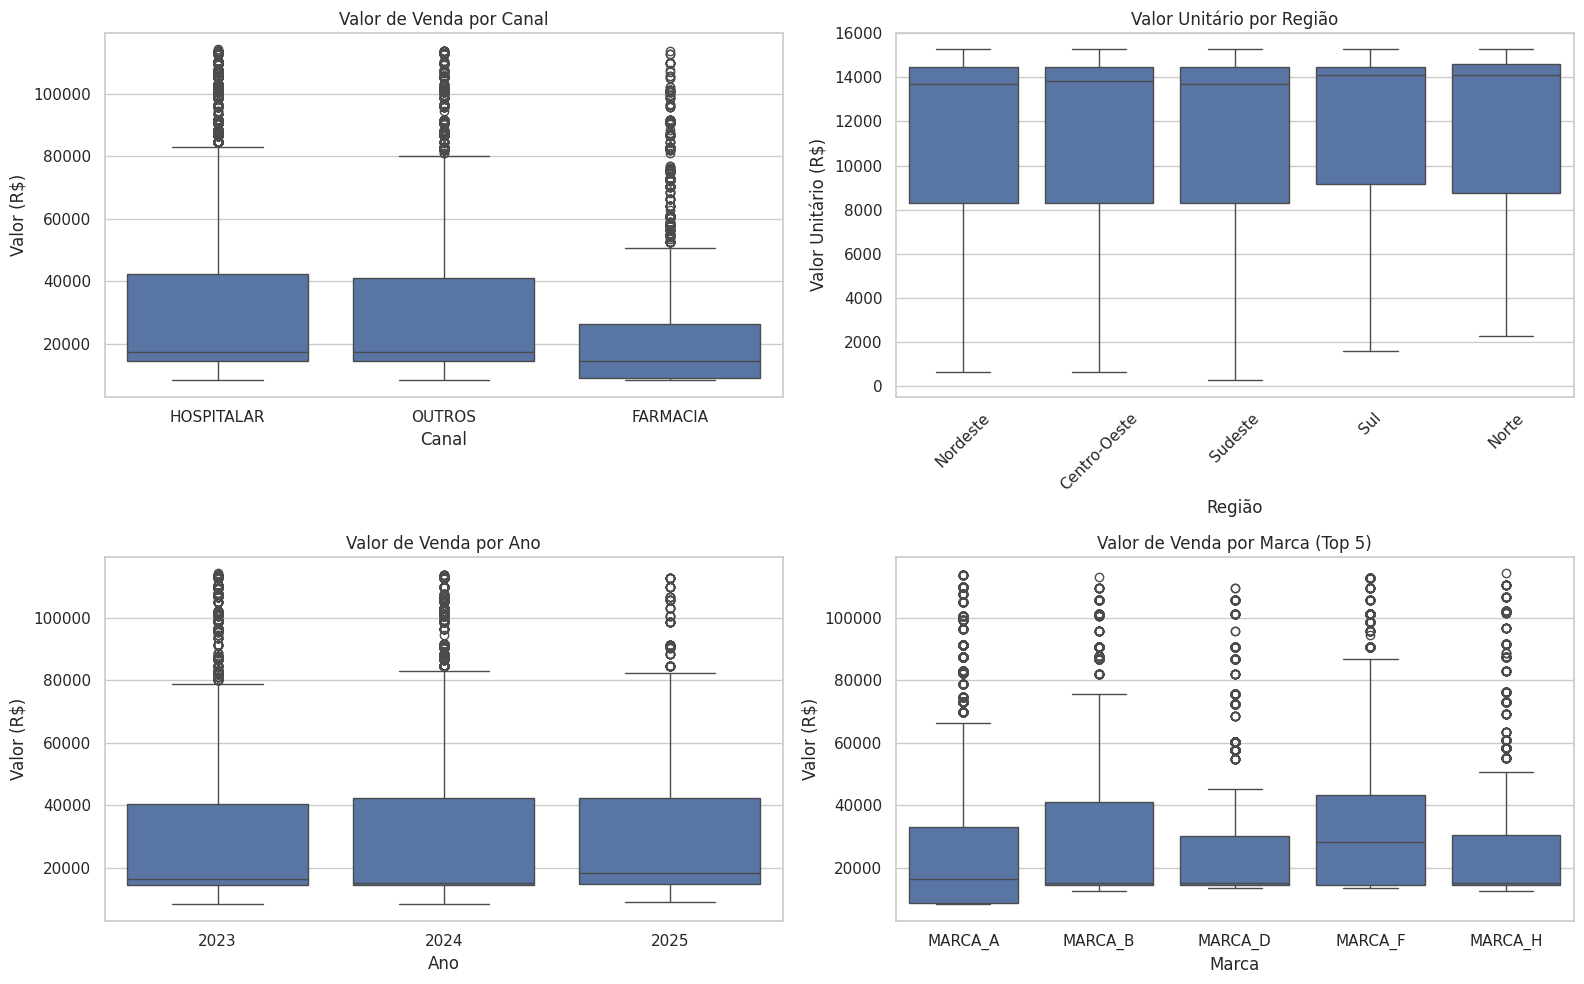

In [202]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# 1. Qual canal de venda apresenta maior valor m√©dio?
sns.boxplot(data=df_limpo, x='CANAL', y='VALOR', ax=axs[0, 0])
axs[0, 0].set_title('Valor de Venda por Canal')
axs[0, 0].set_xlabel('Canal')
axs[0, 0].set_ylabel('Valor (R$)')

# 2. Valor unit√°rio m√©dio por regi√£o
sns.boxplot(data=df_limpo, x='REGIAO', y='VALOR_UNITARIO', ax=axs[0, 1])
axs[0, 1].set_title('Valor Unit√°rio por Regi√£o')
axs[0, 1].set_xlabel('Regi√£o')
axs[0, 1].set_ylabel('Valor Unit√°rio (R$)')
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Comparativo do valor m√©dio por ano
sns.boxplot(data=df_limpo, x='ANO', y='VALOR', ax=axs[1, 0])
axs[1, 0].set_title('Valor de Venda por Ano')
axs[1, 0].set_xlabel('Ano')
axs[1, 0].set_ylabel('Valor (R$)')

# 4. Valor de venda por marca
top_marcas = df_limpo['MARCA'].value_counts().index[:5]  # limitar √†s 5 maiores
sns.boxplot(data=df_limpo[df_limpo['MARCA'].isin(top_marcas)], x='MARCA', y='VALOR', ax=axs[1, 1])
axs[1, 1].set_title('Valor de Venda por Marca (Top 5)')
axs[1, 1].set_xlabel('Marca')
axs[1, 1].set_ylabel('Valor (R$)')

plt.tight_layout()
plt.show()

1. Qual canal de venda apresenta maior valor m√©dio?

*   Hospitalar e Outros possuem valores m√©dios similares, significativamente maiores que o canal Farm√°cia;
*   O canal Farm√°cia apresenta menor dispers√£o e menor valor m√©dio, indicando vendas menores e possivelmente mais frequentes;
*   O canal Hospitalar mostra maior variabilidade, com valores altos frequentes, sugerindo tratamentos de alto custo concentrados nesse canal.


2. Valor unit√°rio m√©dio por regi√£o

*   As regi√µes apresentam valores unit√°rios m√©dios bastante pr√≥ximos, sem grandes diferen√ßas evidentes;
*   A regi√£o Nordeste mostra uma leve tend√™ncia a ter valores unit√°rios medianos mais elevados;
*   A dispers√£o relativamente uniforme em todas as regi√µes sugere consist√™ncia nacional na precifica√ß√£o por unidade, sem diferen√ßas regionais muito marcantes.

3. Comparativo do valor m√©dio por ano

*   Os valores m√©dios anuais se mant√™m relativamente est√°veis entre 2023 e 2025, sem grandes varia√ß√µes:
*   A presen√ßa constante de valores elevados (outliers) ao longo dos anos indica que tratamentos caros persistem regularmente ao longo do tempo:
*   N√£o h√° uma tend√™ncia clara de aumento ou diminui√ß√£o significativa no valor m√©dio, sugerindo estabilidade no mercado durante esses anos.

4. Valor de venda por marca (Top 5)

*   Marca F claramente se destaca com um valor m√©dio mais alto e maior dispers√£o, indicando que seus produtos tendem a ser vendidos por pre√ßos mais elevados e variados;
*   As marcas A, B, D e H possuem valores m√©dios relativamente pr√≥ximos, sendo a marca A com os menores valores m√©dios dentre as cinco principais;
*   A alta quantidade de valores discrepantes (outliers) em todas as marcas indica que h√° uma diversidade consider√°vel de pre√ßos praticados mesmo dentro das principais marcas.







In [203]:
# ----- 5. Visualizar previs√µes futuras -----
display(previsoes_finais)

fig_valor = px.bar(previsoes_finais, x='MES', y='VALOR_PREVISTO', title='üìà Previs√£o de Valor Total das Vendas (R$)', text_auto='.2s')
fig_unidades = px.bar(previsoes_finais, x='MES', y='UNIDADES_PREVISTO', title='üì¶ Previs√£o de Unidades Vendidas', text_auto='.2s')

fig_valor.show()
fig_unidades.show()


MES  VALOR_PREVISTO  UNIDADES_PREVISTO
0 2025-02-01     65926208.81            6456.84
1 2025-03-01     66520592.32            6499.20
2 2025-04-01     67178659.78            6546.10
3 2025-05-01     67815499.25            6591.49
4 2025-06-01     68473566.71            6638.38
5 2025-07-01     69110406.19            6683.77

5. Como ser√° a evolu√ß√£o do valor total das vendas nos pr√≥ximos meses?


*   H√° uma tend√™ncia clara de crescimento gradual no valor total das vendas previsto, subindo de aproximadamente R$ 65,9 milh√µes em Fevereiro para cerca de R$ 69,1 milh√µes em Julho de 2025;
*   Essa evolu√ß√£o crescente indica que o mercado para medicamentos de c√¢ncer de pr√≥stata pode estar em expans√£o, sugerindo aumento de consumo ou aumento do valor m√©dio dos medicamentos vendidos.

6. Qual √© a previs√£o para as unidades vendidas?

*   O n√∫mero de unidades vendidas tamb√©m mostra tend√™ncia positiva, com previs√£o de aumento mensal cont√≠nuo, iniciando em cerca de 6.457 unidades em Fevereiro e alcan√ßando aproximadamente 6.684 unidades em Julho;
*   O crescimento consistente das unidades vendidas refor√ßa a interpreta√ß√£o de aumento na demanda pelos medicamentos analisados.

7. Quais insights estrat√©gicos podem ser obtidos a partir dessas previs√µes?


*   A previs√£o demonstra um mercado aquecido e em expans√£o moderada, sugerindo oportunidades para investimento em log√≠stica, estoques, negocia√ß√µes com fornecedores e expans√£o em canais estrat√©gicos (especialmente hospitalares);
*   Com o aumento previsto nas unidades, √© importante assegurar disponibilidade e evitar rupturas nos estoques dos principais canais.

---
**Conclus√£o e recomenda√ß√£o**

* A previs√£o sugere estabilidade positiva no mercado, com crescimento gradativo tanto em faturamento quanto em volume;

* Recomenda-se monitorar continuamente esses valores previstos e ajust√°-los com novas vari√°veis externas, como campanhas de sa√∫de p√∫blica ou mudan√ßas regulat√≥rias que possam influenciar diretamente a demanda futura.



